## *santoshhulbutti@gmail.com | DataTrained | Practice Project # 01

## *Salary Project*
### Problem Statement: Predict the salary if the employee using the features provided in the data. 

In [1]:
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv"

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

import statsmodels.formula.api as smf

import scipy.stats as stat
import pylab 

from sklearn.svm import SVR
import lightgbm as lgb
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor 
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, Lars, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.preprocessing import PowerTransformer, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from pycaret.regression import setup, compare_models

C:\Users\santo\anaconda3\envs\newpycaret_1\lib\site-packages\pycaret\loggers\mlflow_logger.py:14: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  import mlflow


In [3]:
df0 = pd.read_csv(url)
df0.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
df0.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


##  Data Cleaning, filling null values if any.

In [6]:
df0.rename(columns={'yrs.since.phd': 'yrs_since_phd', 'yrs.service': 'yrs_service'}, inplace=True)

In [7]:
df0.isna().sum().sum()

0

In [8]:
## No missing Values

In [9]:
df0['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [10]:
df0['discipline'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

In [11]:
df0['sex'].value_counts()

Male      358
Female     39
Name: sex, dtype: int64

In [12]:
df1 = df0.copy()

##  Encoding
### ordinal encoding and pd.get dummies

In [13]:
rank_dict = {'AsstProf': 1, 'AssocProf': 2, 'Prof': 3}

df1['rank'] = df1['rank'].map(rank_dict)

In [14]:
df1 = pd.get_dummies(df1, drop_first=True)

In [15]:
df2 = df1.copy()

In [16]:
df2.head()

,rank,yrs_since_phd,yrs_service,salary,discipline_B,sex_Male
0,3,19,18,139750,1,1
1,3,20,16,173200,1,1
2,1,4,3,79750,1,1
3,3,45,39,115000,1,1
4,3,40,41,141500,1,1


In [17]:
df2.shape

(397, 6)

In [18]:
df2.describe()

,rank,yrs_since_phd,yrs_service,salary,discipline_B,sex_Male
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,2.501259,22.314861,17.614610,113706.458438,0.544081,0.901763
std,0.767472,12.887003,13.006024,30289.038695,0.498682,0.298010
min,1.000000,1.000000,0.000000,57800.000000,0.000000,0.000000
25%,2.000000,12.000000,7.000000,91000.000000,0.000000,1.000000
50%,3.000000,21.000000,16.000000,107300.000000,1.000000,1.000000
75%,3.000000,32.000000,27.000000,134185.000000,1.000000,1.000000
max,3.000000,56.000000,60.000000,231545.000000,1.000000,1.000000


# Initial predictions using linear models

## Using LinearRegression() & NO Standardisation

In [19]:
y = df2['salary']
x = df2.drop(['salary'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=400)
lin_reg = LinearRegression()


lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)


print('r2 score : ', r2_score(y_test, y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))

print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.6213076853231545
MAE :  12978.266449141549
MSE :  261241497.95150918
SMSE :  16162.966867240346
-----------
-----------
training score :  0.40840562786984513
testing score :  0.6213076853231545


## Using Ridge() & NO Standardisation

In [20]:
y = df2['salary']
x = df2.drop(['salary'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=400)
lin_reg = Ridge()


lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)


print('r2 score : ', r2_score(y_test, y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))


print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.620696406875483
MAE :  12992.958012425177
MSE :  261663189.36468568
SMSE :  16176.00659509898
-----------
-----------
training score :  0.4083772218315569
testing score :  0.620696406875483


## Using BayesianRidge() & NO Standardisation

In [21]:
y = df2['salary']
x = df2.drop(['salary'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=400)
lin_reg = BayesianRidge()


lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)


print('r2 score : ', r2_score(y_test, y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))


print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.6184709618467635
MAE :  13035.379077093017
MSE :  263198416.17119622
SMSE :  16223.391019487764
-----------
-----------
training score :  0.40799514366765954
testing score :  0.6184709618467635


## checking tha data distribution..

0.29974153157458827


<AxesSubplot:ylabel='Frequency'>

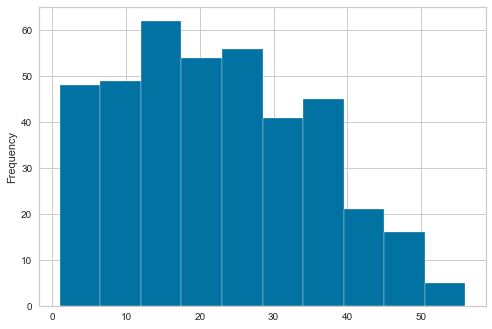

In [22]:
print(stat.skew(df2['yrs_since_phd']))
df2['yrs_since_phd'].plot(kind="hist")

0.6481088240680348


<AxesSubplot:ylabel='Frequency'>

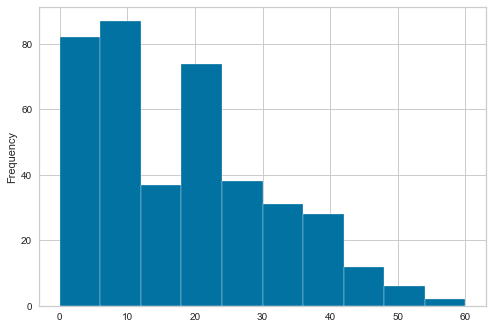

In [23]:
print(stat.skew(df2['yrs_service']))
df2['yrs_service'].plot(kind="hist")

0.7118657337591157


<AxesSubplot:ylabel='Frequency'>

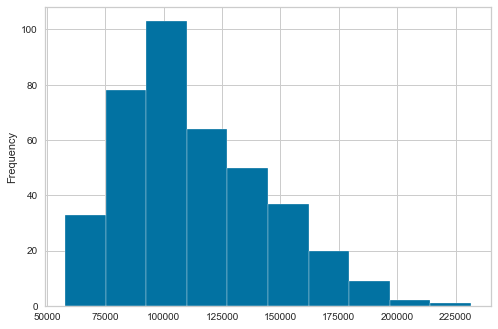

In [24]:
print(stat.skew(df2['salary']))
df2['salary'].plot(kind="hist")

<AxesSubplot:xlabel='sex_Male', ylabel='salary'>

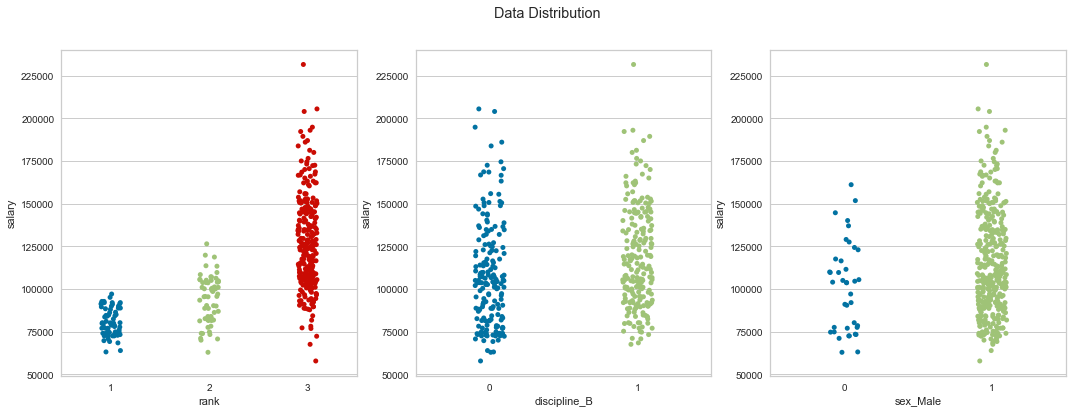

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Data Distribution')

sns.stripplot(ax=axes[0], x=df2['rank'], y = df2['salary'])
sns.stripplot(ax=axes[1], x=df2['discipline_B'], y = df2['salary'])
sns.stripplot(ax=axes[2], x=df2['sex_Male'], y = df2['salary'])

<AxesSubplot:xlabel='yrs_since_phd', ylabel='salary'>

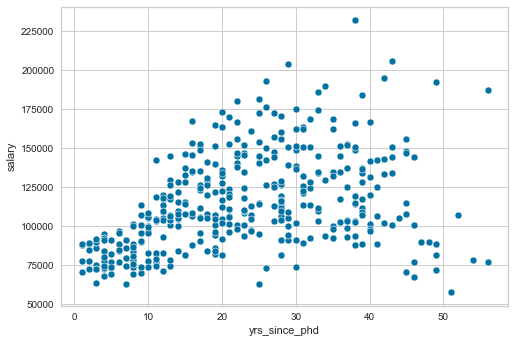

In [26]:
sns.scatterplot(data = df2, x='yrs_since_phd', y='salary')

<AxesSubplot:xlabel='yrs_service', ylabel='salary'>

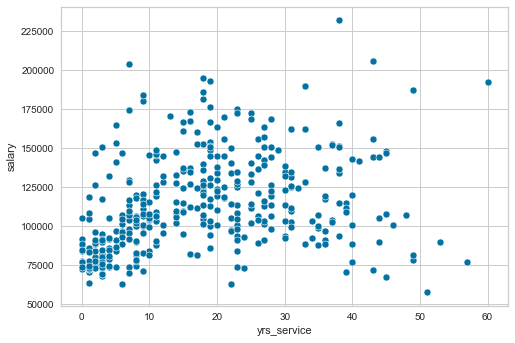

In [27]:
sns.scatterplot(data = df2, x='yrs_service', y='salary')

<AxesSubplot:>

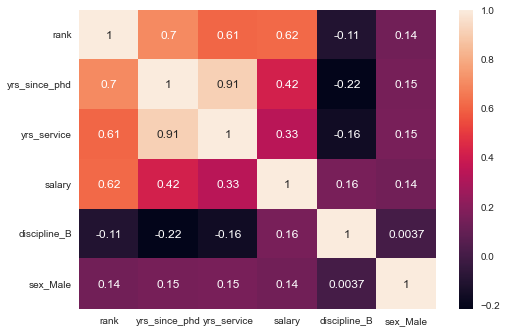

In [28]:
# checking correlation with salary
sns.heatmap(df2.corr(), annot=True)

In [29]:
## removing 'discipline column'
y = df2['salary']
x = df2.drop(['salary', 'discipline_B'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=400)
lin_reg = Ridge()


lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)


print('r2 score : ', r2_score(y_test, y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))


print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.5275527310985958
MAE :  14964.54399636577
MSE :  325918502.8252404
SMSE :  18053.213088678713
-----------
-----------
training score :  0.3626201113364623
testing score :  0.5275527310985958


## from above it is observed that even if the 'discipline column' has very low corelation with salary - label, it has some affect on predictions, hence we cannot discard the discipline column.

## to improve predictions, lets use standardscaler/powertransformation

## Using BayesianRidge(),  applying StandardScaler() on features & log transformation on target

In [30]:
y = df2['salary']
x = df2.drop(['salary'], axis=1)

scaler = StandardScaler()
x1 = scaler.fit_transform(x)
X = pd.DataFrame(x1, index = x.index, columns = x.columns)
Y = np.log(y)



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=400)
lin_reg = BayesianRidge()


lin_reg.fit(x_train, y_train)

y_pred = np.exp(lin_reg.predict(x_test))


print('r2 score : ', r2_score(np.exp(y_test), y_pred))
print('MAE : ', mean_absolute_error(np.exp(y_test), y_pred))
print('MSE : ', mean_squared_error(np.exp(y_test), y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(np.exp(y_test), y_pred)))


print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.6378994930583135
MAE :  12608.444064307132
MSE :  249795612.8926714
SMSE :  15804.923691453603
-----------
-----------
training score :  0.4767213183648854
testing score :  0.6921097126028205


## Using LinearRegression(), applying StandardScaler()  on features & log transformation on target

In [31]:
y = df2['salary']
x = df2.drop(['salary'], axis=1)

scaler = StandardScaler()
x1 = scaler.fit_transform(x)
X = pd.DataFrame(x1, index = x.index, columns = x.columns)
Y = np.log(y)



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=400)
lin_reg = LinearRegression()


lin_reg.fit(x_train, y_train)

y_pred = np.exp(lin_reg.predict(x_test))


print('r2 score : ', r2_score(np.exp(y_test), y_pred))
print('MAE : ', mean_absolute_error(np.exp(y_test), y_pred))
print('MSE : ', mean_squared_error(np.exp(y_test), y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(np.exp(y_test), y_pred)))



print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.6410659115256696
MAE :  12509.595242026076
MSE :  247611254.0570311
SMSE :  15735.668211329035
-----------
-----------
training score :  0.4769731361936823
testing score :  0.6950243683056851


## Using LinearRegression(), applying PowerTransformer()  on features & log transformation on target

In [32]:
y = df2['salary']
x = df2.drop(['salary'], axis=1)

scaler = PowerTransformer()
x1 = scaler.fit_transform(x)
X = pd.DataFrame(x1, index = x.index, columns = x.columns)
Y = np.log(y)



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=400)
lin_reg = LinearRegression()


lin_reg.fit(x_train, y_train)

y_pred = np.exp(lin_reg.predict(x_test))


print('r2 score : ', r2_score(np.exp(y_test), y_pred))
print('MAE : ', mean_absolute_error(np.exp(y_test), y_pred))
print('MSE : ', mean_squared_error(np.exp(y_test), y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(np.exp(y_test), y_pred)))


print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.6339750435177522
MAE :  12677.113025791035
MSE :  252502900.67453784
SMSE :  15890.339853965927
-----------
-----------
training score :  0.4811740510675492
testing score :  0.6893069542962846


## Based on above iterations we found that, Using LinearRegression() model & applying PowerTransformer() on the feature & log transformation on target, yeild a r2_score of 63.4% which is highest in all the iterarations done.

<AxesSubplot:>

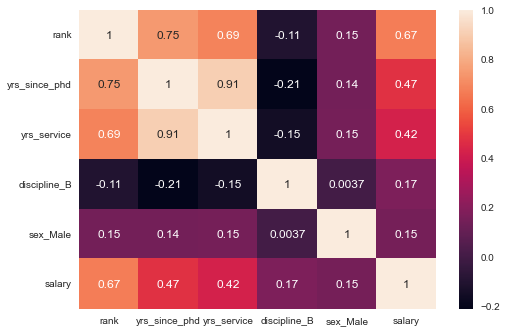

In [33]:
for_corr = pd.concat([X, Y], axis = 1)
sns.heatmap(for_corr.corr(), annot=True)

## removing sex column.. & studying impact on the predictions..

In [34]:
y = df2['salary']
x = df2.drop(['salary', 'sex_Male'], axis=1)

scaler = PowerTransformer()
x1 = scaler.fit_transform(x)
X = pd.DataFrame(x1, index = x.index, columns = x.columns)
Y = np.log(y)



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=400)
lin_reg = LinearRegression()


lin_reg.fit(x_train, y_train)

y_pred = np.exp(lin_reg.predict(x_test))


print('r2 score : ', r2_score(np.exp(y_test), y_pred))
print('MAE : ', mean_absolute_error(np.exp(y_test), y_pred))
print('MSE : ', mean_squared_error(np.exp(y_test), y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(np.exp(y_test), y_pred)))


print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.6315704849856725
MAE :  12874.521081868146
MSE :  254161689.2173384
SMSE :  15942.449285393333
-----------
-----------
training score :  0.4786741972398181
testing score :  0.6877452610728796


## Checking distribution after transformation..

-0.1322553119071545


<AxesSubplot:ylabel='Frequency'>

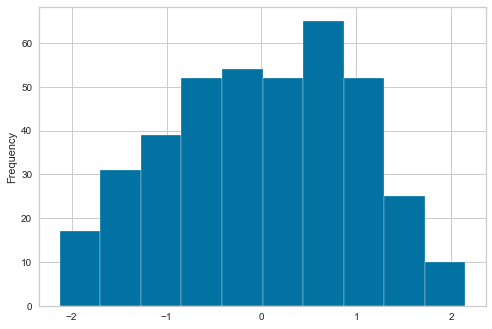

In [35]:
print(stat.skew(X['yrs_since_phd']))
X['yrs_since_phd'].plot(kind="hist")

-0.1216894934107749


<AxesSubplot:ylabel='Frequency'>

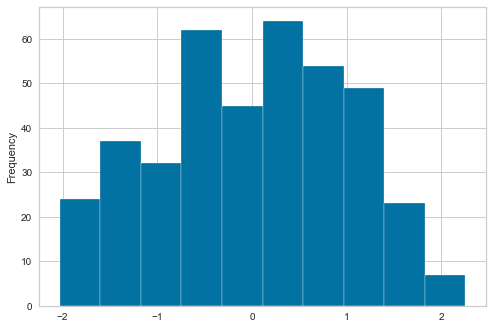

In [36]:
print(stat.skew(X['yrs_service']))
X['yrs_service'].plot(kind="hist")

0.14153547418619686


<AxesSubplot:ylabel='Frequency'>

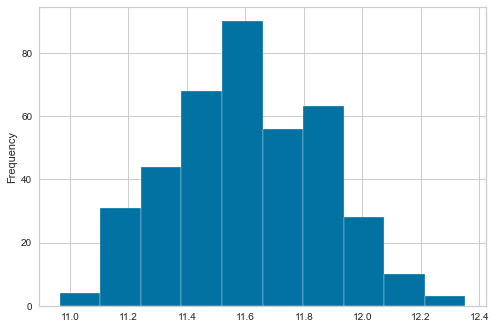

In [37]:
print(stat.skew(Y))
Y.plot(kind="hist")

In [38]:
y = df2['salary']
x = df2.drop(['salary'], axis=1)

scaler = PowerTransformer()
x1 = scaler.fit_transform(x)
X = pd.DataFrame(x1, index = x.index, columns = x.columns)
Y = np.log(y)


lm_multi_1 = smf.ols(formula = 'salary ~ rank + yrs_since_phd + yrs_service + sex_Male + discipline_B', data = pd.concat([X , Y], axis=1)).fit()

lm_multi_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     84.12
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           7.69e-60
Time:                        23:14:02   Log-Likelihood:                 116.66
No. Observations:                 397   AIC:                            -221.3
Df Residuals:                     391   BIC:                            -197.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.6073      0.009   1272.565      0.000      11.589      11.625
rank              0.1783      0.014     12.915      0.000       0.151       0.205
yrs_since_phd     0.0352      0.024      1.441      0.150      -0.013       0.083
yrs_service      -0.0360      0.022     -1.633      0.103      -0.079       0.007
sex_Male          0.0125      0.009      1.349      0.178      -0.006       0.031
discipline_B      0.0664      0.009      7.053      0.000       0.048       0.085
==============================================================================
Omnibus:                        8.439   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               14.144
Skew:                           0.003   Prob(JB):                     0.000849
Kurtosis:                       3.925   Cond. No.                         5.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## learning about best models for given data & choosing nest model

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1162)
_ = setup(data = pd.concat([x_train, y_train], axis = 1), target = 'salary', fold_shuffle=True, session_id=2)

,Description,Value
0,session_id,2
1,Target,salary
2,Original Data,"(317, 6)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(221, 5)"


In [40]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.1513,0.0367,0.1886,0.4238,0.0149,0.0130,0.0080
ridge,Ridge Regression,0.1512,0.0368,0.1887,0.4230,0.0149,0.0130,0.0080
lr,Linear Regression,0.1512,0.0368,0.1888,0.4222,0.0149,0.0130,0.7240
lar,Least Angle Regression,0.1512,0.0368,0.1888,0.4222,0.0149,0.0130,0.0070
huber,Huber Regressor,0.1501,0.0372,0.1902,0.4122,0.0150,0.0128,0.0100
lightgbm,Light Gradient Boosting Machine,0.1538,0.0392,0.1942,0.3797,0.0153,0.0132,0.0320
omp,Orthogonal Matching Pursuit,0.1647,0.0404,0.1982,0.3647,0.0156,0.0141,0.0060
catboost,CatBoost Regressor,0.1509,0.0396,0.1946,0.3598,0.0153,0.0129,0.1450
ada,AdaBoost Regressor,0.1543,0.0404,0.1969,0.3431,0.0155,0.0132,0.0150
rf,Random Forest Regressor,0.1536,0.0408,0.1968,0.3290,0.0155,0.0132,0.1090


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

## Baseline  model

In [41]:
# baseline_model = AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
#                   n_estimators=50, random_state=2)

# baseline_model = OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
#                           normalize=True, precompute='auto', tol=None)


baseline_model = BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)


# baseline_model = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
#       normalize=False, random_state=2, solver='auto', tol=0.001)

# baseline_model = lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
#               importance_type='split', learning_rate=0.1, max_depth=-1,
#               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
#               random_state=2, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
#               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [42]:
baseline_model.fit(x_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [43]:
kf = KFold(n_splits = 5)
results = cross_val_score(baseline_model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [44]:
-results

array([0.04576521, 0.03980941, 0.03988561, 0.03227291, 0.03313851])

In [45]:
np.exp(np.sqrt(np.mean(-results)))

1.2157759664887462

In [46]:
np.exp(y_test)

147    156938.0
49      70768.0
314    146800.0
392    103106.0
179     92000.0
         ...   
274     78500.0
334    104542.0
263    126000.0
180    142467.0
114    105000.0
Name: salary, Length: 80, dtype: float64

In [47]:
test_ids = pd.Series(y_test.index, name='id')
y_pred = np.exp(baseline_model.predict(x_test))
sub = pd.concat([test_ids, pd.Series(y_pred, name='salary')], axis=1)
sub

,id,salary
0,147,130611.351221
1,49,86587.164709
2,314,120897.479265
3,392,115780.701760
4,179,82809.038064
...,...,...
75,274,74640.629068
76,334,95768.856778
77,263,114930.905540
78,180,129712.429509


In [48]:
y_pred

array([130611.3512206 ,  86587.16470882, 120897.47926543, 115780.70176   ,
        82809.03806359,  84374.87817167, 117726.41558231, 130543.52391623,
       115821.82973729,  96709.86920078,  77306.62343242, 115899.15479034,
       117563.0695087 ,  96455.54481786, 135702.36517547, 116308.85981675,
       133345.69326858, 115779.40121065, 130563.25968753, 124301.18392749,
       131318.2770317 , 130475.34996693,  86339.85685458,  77306.62343242,
        86250.11470012,  73555.98031433, 117067.31169149,  80620.99866678,
        77597.26673923,  86863.44710124, 130343.35296792, 118862.56127835,
       115175.53164777,  86587.16470882, 116104.75978537,  87843.61595301,
        76864.82685248, 137963.68775113, 114239.11891024, 133017.16476117,
       114448.52353384,  87345.61128917, 111655.84583635, 117922.71463117,
        86342.00832049, 116330.320748  , 131331.41016042,  86284.75441759,
       129671.3819831 , 115680.72248328,  78168.67220559,  79045.47915219,
        86863.44710124,  

In [50]:
print('r2 score : ', r2_score(np.exp(y_test), y_pred))
print('MAE : ', mean_absolute_error(np.exp(y_test), y_pred))
print('MSE : ', mean_squared_error(np.exp(y_test), y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(np.exp(y_test), y_pred)))


print("-----------")
print("-----------")

print('training score : ', baseline_model.score(x_train, y_train))
print('testing score : ', baseline_model.score(x_test, y_test))

r2 score :  0.6883399764589231
MAE :  11366.481142024215
MSE :  212053159.823879
SMSE :  14562.045179983443
-----------
-----------
training score :  0.4608879690207285
testing score :  0.7303204668963823


# Bagging models

In [51]:
models = {
    'ridge' : Ridge(),
    'br' : BayesianRidge(),
    'lr' : LinearRegression(),
    'lar': Lars(),
    'huber' : HuberRegressor() 
}

In [52]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + ' trained.')

ridge trained.
br trained.
lr trained.
lar trained.
huber trained.


In [53]:
results = {}

kf = KFold(n_splits = 5)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

In [54]:
results

{'ridge': array([1.23804719, 1.22103836, 1.2197473 , 1.19751539, 1.20049444]),
 'br': array([1.23853355, 1.22082025, 1.22105327, 1.19679438, 1.19966202]),
 'lr': array([1.23793036, 1.22112474, 1.21945368, 1.19775037, 1.20078151]),
 'lar': array([1.23793036, 1.22112474, 1.21945368, 1.19775037, 1.20078151]),
 'huber': array([1.23856878, 1.22241836, 1.22118986, 1.20321101, 1.20075544])}

In [55]:
for name, result in results.items():
    print("------\n" + name + '\n------')
    print(np.mean(result))
    print(np.std(result))

------
ridge
------
1.2153685364945757
0.014870206928788862
------
br
------
1.2153726916479173
0.015429510275320392
------
lr
------
1.2154081299919375
0.014710753259363305
------
lar
------
1.2154081299919377
0.014710753259363347
------
huber
------
1.2172286904447596
0.01389882136194065


## Combine predictions

In [56]:
def predict_salary(x_test):
    final_pred = (
        0.2*np.exp(models['ridge'].predict(x_test)) +
        0.2*np.exp(models['br'].predict(x_test)) +
        0.2*np.exp(models['lr'].predict(x_test)) +
        0.2*np.exp(models['lar'].predict(x_test)) +
        0.2*np.exp(models['huber'].predict(x_test)))
    return final_pred

final_pred = predict_salary(x_test)

In [57]:
final_pred

array([131081.01139676,  86441.09727752, 120426.77263456, 115393.67418908,
        82896.1007231 ,  83762.96883003, 117304.46717373, 131016.39984741,
       115435.33358234,  96651.7131292 ,  76640.33007355, 115509.29622225,
       117145.23850814,  96399.55568968, 136109.7198856 , 115915.42150112,
       133787.57010599, 115395.44711146, 131029.21387474, 125092.46540596,
       131786.90910602, 130945.48433316,  86370.64277874,  76640.33007355,
        86114.10143838,  73120.25871144, 116661.12211496,  80248.50200878,
        76924.35789172,  86714.98556151, 130813.87485666, 118421.86100417,
       114799.09565613,  86441.09727752, 115710.84446331,  87676.60441129,
        76207.85310768, 138339.8319147 , 114107.3689624 , 133460.23849403,
       114083.15362572,  87188.9583591 , 111561.26833908, 117499.93274767,
        86202.44481691, 115934.6536497 , 131797.71704116,  86147.19189774,
       130147.50526044, 115295.03606659,  77483.45826293,  78342.12417664,
        86714.98556151,  

In [59]:
print('r2 score : ', r2_score(np.exp(y_test), final_pred))
print('MAE : ', mean_absolute_error(np.exp(y_test), final_pred))
print('MSE : ', mean_squared_error(np.exp(y_test), final_pred))
print('SMSE : ', np.sqrt(mean_squared_error(np.exp(y_test), final_pred)))

r2 score :  0.6898446201008952
MAE :  11307.237545780765
MSE :  211029401.83572283
SMSE :  14526.851064002922


## Conclusion : Using Bagging model for given dataset is the best approach